# <p style="background-color:#3ab1c8;font-family:Cursive;font-size:180%;color:black;text-align:center;border-radius:30px 30px;"><b>ML_Decision Tree (CARt_Regression) - 30 Nov 23</b></p>
<p style="font-family:Cursive;font-size:150%;color:black;text-align:center;border-radius:10px 10px;"><b>Nash N. Sungur</b></p>

<b style="font-family:Cursive;font-size:150%;color:black;text-align:center;border-radius:10px 10px;">Follow me [Linkedin](www.linkedin.com/in/nash-n-sungur-333869289) | [Git Hub](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0)</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


datamızı tanıyalım
- **Car_Name**: Arabanın adı veya modeli.
* **Year**: Arabanın üretim yılı.
* **Selling_Price**: Arabanın satış fiyatı.
* **Present_Price**: Arabanın şu anki showroom fiyatı.
* **Kms_Driven**: Satış noktasına kadar arabayla gidilen toplam kilometre.
* **Fuel_Type**: Arabanın kullandığı yakıt tipi (örneğin, Benzin, Dizel, CNG vb.).
* **Seller_Type**: Arabayı satan satıcı tipi (örneğin, Bayi veya Bireysel).
* **Transmission**: Arabanın sahip olduğu şanzıman tipi (örneğin, Manuel veya Otomatik).
* **Owner**: Arabanın önceki sahiplerinin sayısı.
* Bu veri seti, bir arabanın özelliklerine dayalı olarak satış fiyatının tahmin edilmesi

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


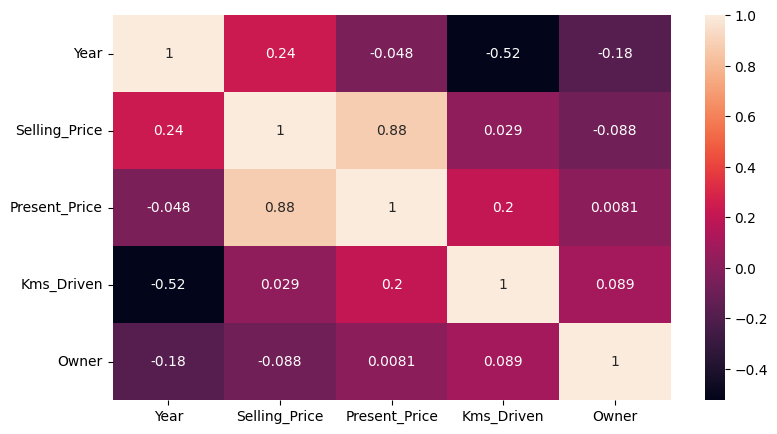

In [7]:
sns.heatmap(df.corr(), annot=True);

In [8]:
df["vehicle_age"] = 2023-df.Year
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [10]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [13]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

KeyError: "['Car_Name', 'Year'] not found in axis"

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [16]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [17]:
df.shape

(301, 9)

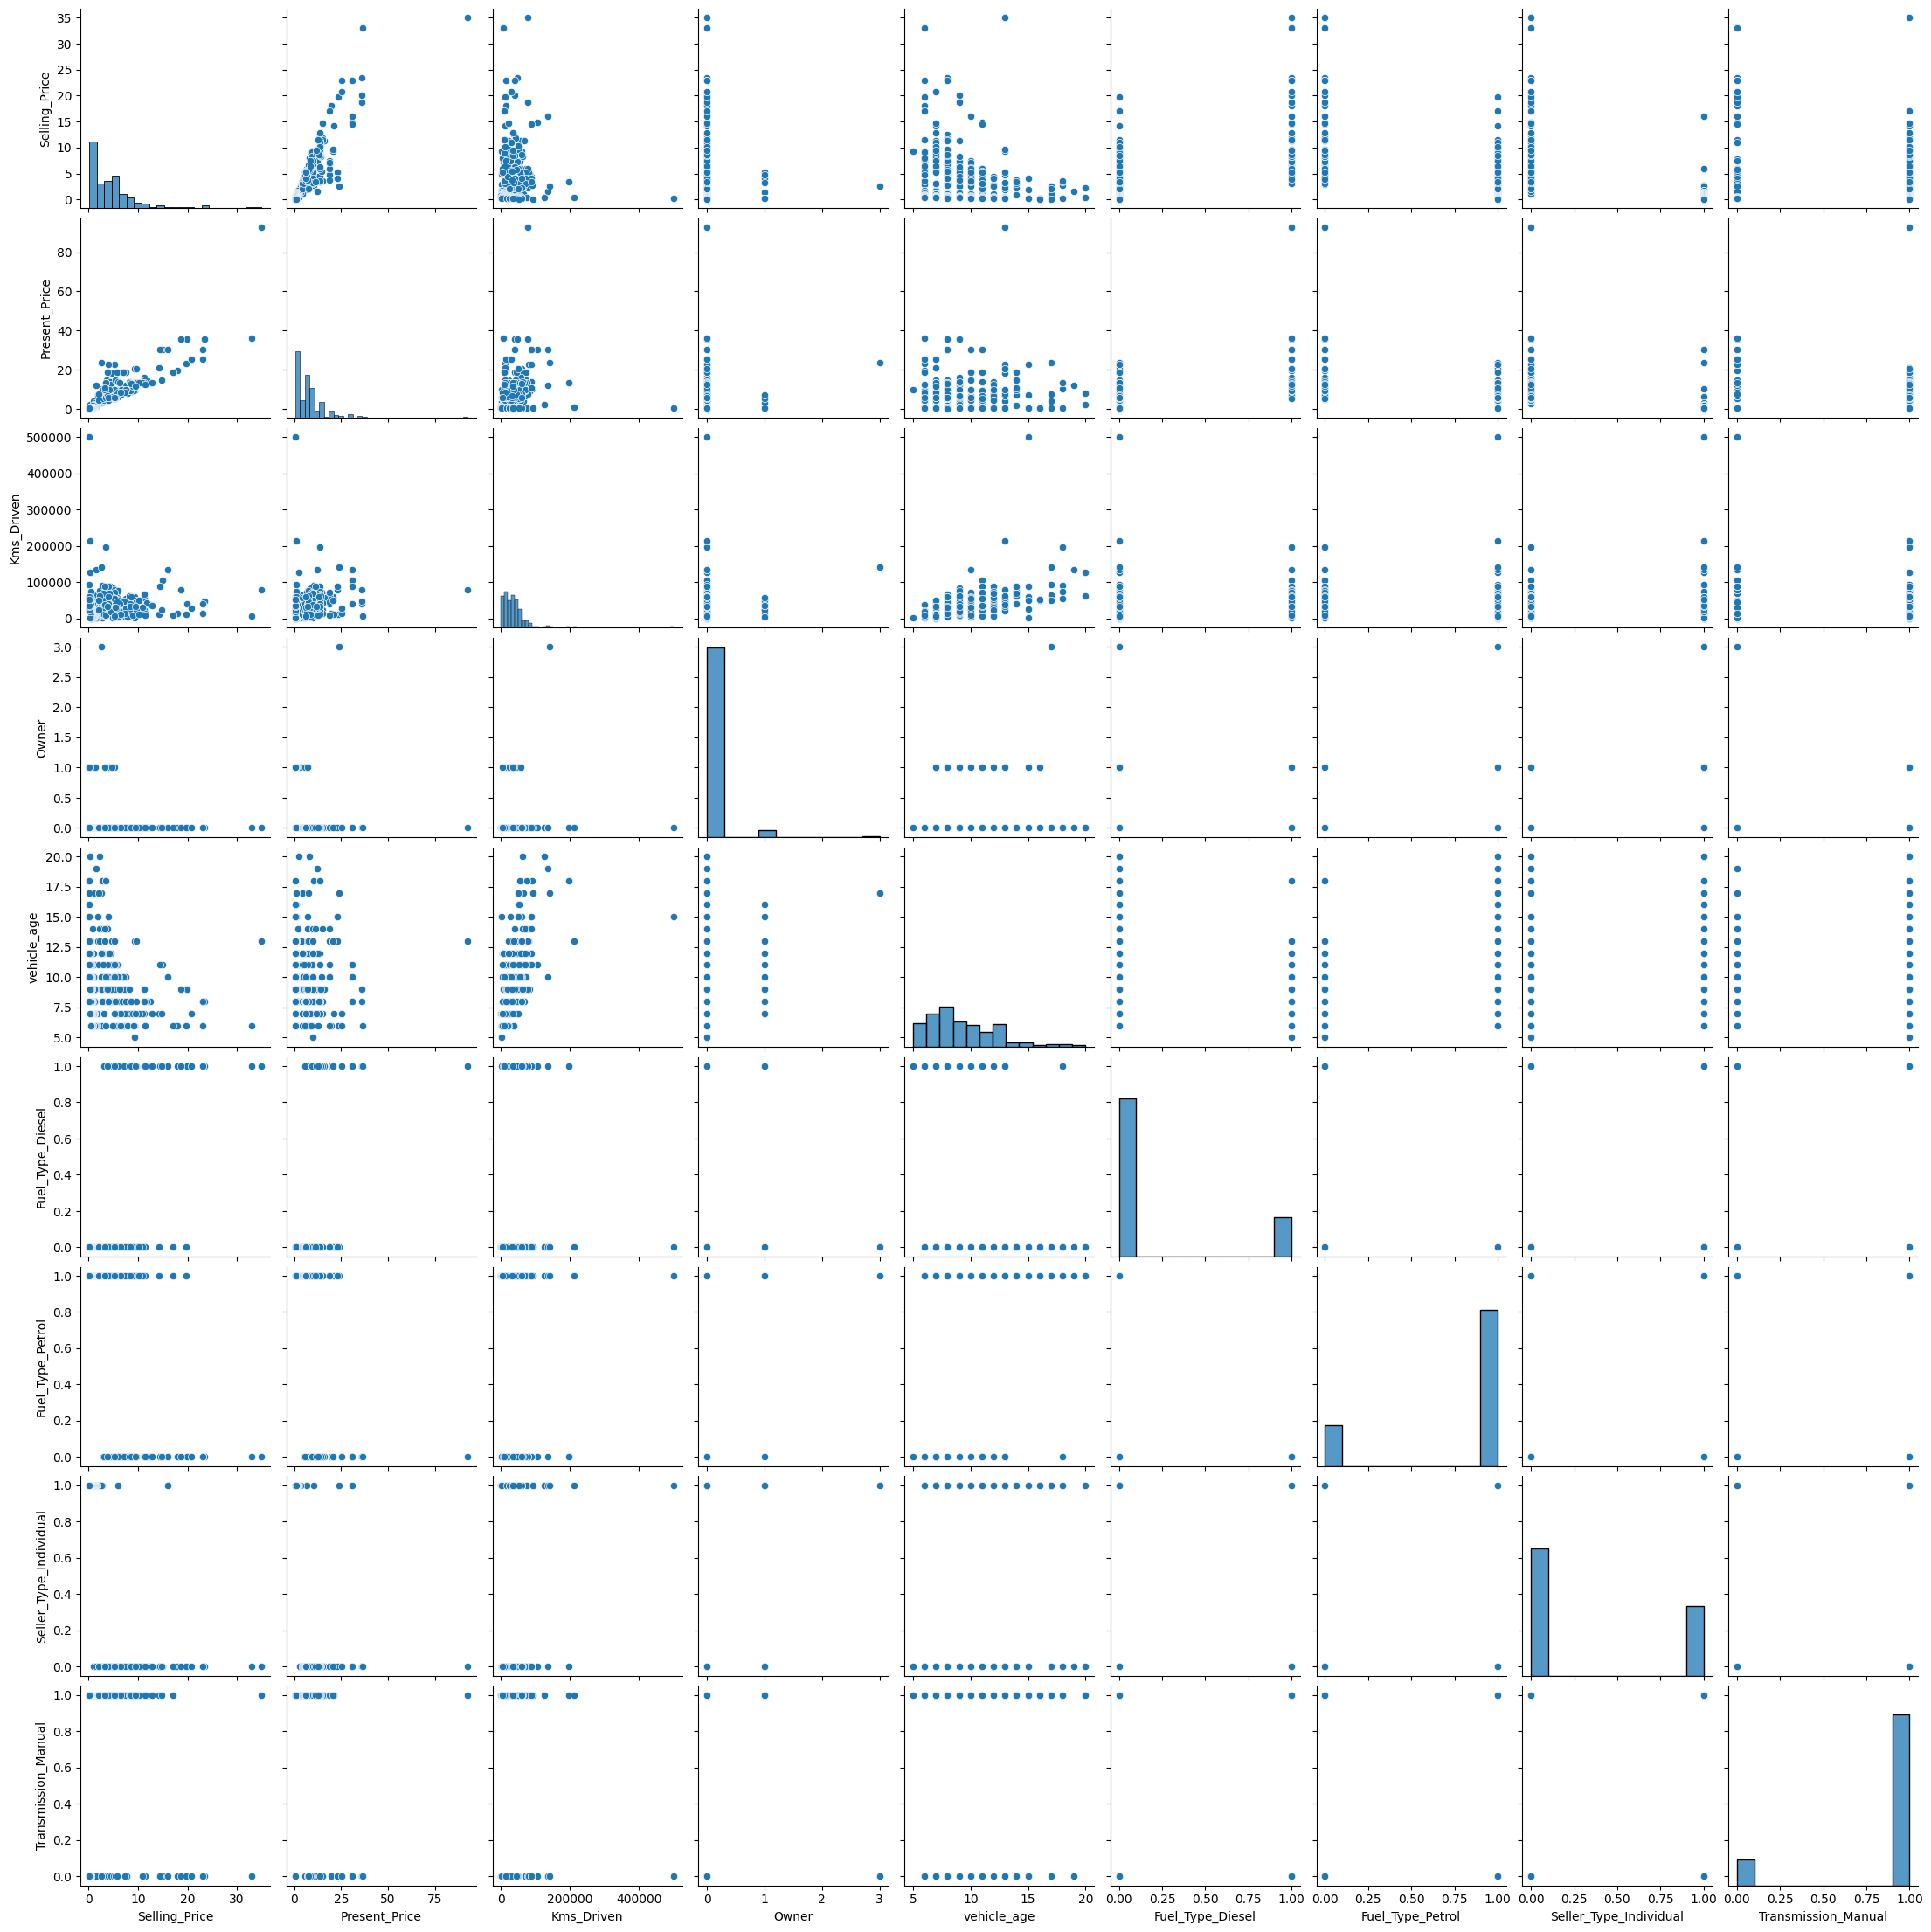

In [18]:
sns.pairplot(df, palette="Dark2");

**Bir notebook'ta sunu gormustum, koralasyon lara bakmadan once ayrica gecici bir encode yapiyor ve categorik degiskenlerin de korelasyon degerlerini gormeye calisiyordu (ilave not olsun istedim)**

# Train | Test Split

In [19]:
X = df.drop("Selling_Price", axis = 1)
y = df.Selling_Price

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


# Modelling

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
DT_model = DecisionTreeRegressor(random_state = 101)

In [55]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [56]:
y_pred = DT_model.predict(X_test)
y_train_pred = DT_model.predict(X_train)

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [37]:
def train_val(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [57]:
train_val(DT_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.0,0.942589
mae,0.0,0.704754
mse,0.0,1.540966
rmse,0.0,1.241356


In [58]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2',
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =5)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.881430
test_neg_mean_absolute_error       -0.828375
test_neg_mean_squared_error        -2.846157
test_neg_root_mean_squared_error   -1.606324
dtype: float64

In [59]:
DT_model.feature_importances_
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_,
                     columns = ["feature Importance"]).sort_values("feature Importance")
df_f_i

,feature Importance
Owner,0.000000
Seller_Type_Individual,0.000104
Fuel_Type_Diesel,0.000616
Fuel_Type_Petrol,0.001590
Transmission_Manual,0.001806
Kms_Driven,0.017682
vehicle_age,0.081051
Present_Price,0.897153


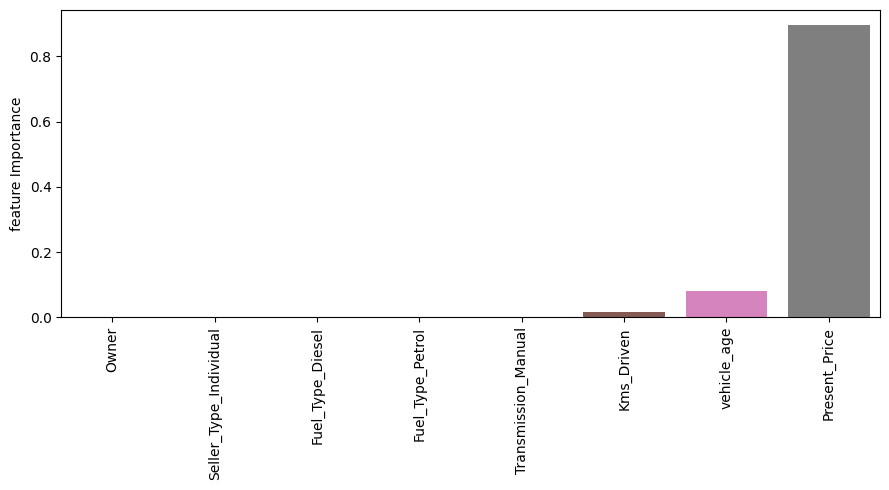

In [60]:
sns.barplot(x=df_f_i.index, y = "feature Importance", data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()

## Drop important feature

# Visualization trees

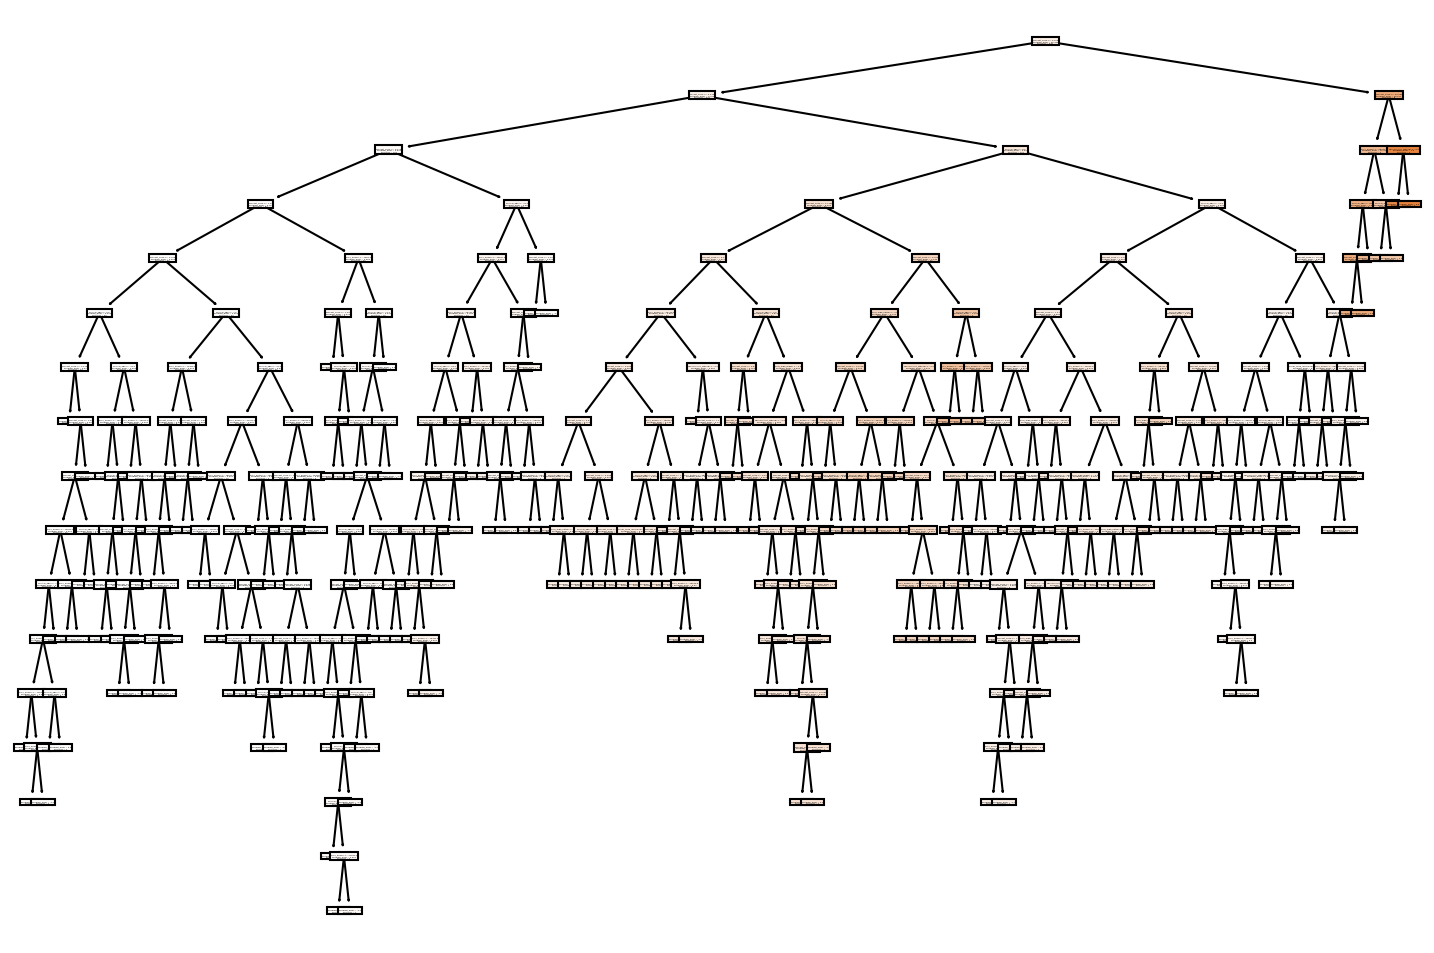

In [62]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8), dpi=150)
plot_tree(DT_model, filled=True, feature_names=X.columns);
plt.show()

In [63]:
pruned_tree = DecisionTreeRegressor(max_depth=3, random_state=101)
pruned_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=101)

In [64]:
train_val(pruned_tree, X_train, y_train, X_test, y_test)

,train,test
R2,0.871127,0.783878
mae,1.105847,1.540649
mse,3.277820,5.800869
rmse,1.810475,2.408499


In [65]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, fontsize=6);



         train      test
R2    0.871127  0.783878
mae   1.105847  1.540649
mse   3.277820  5.800869
rmse  1.810475  2.408499




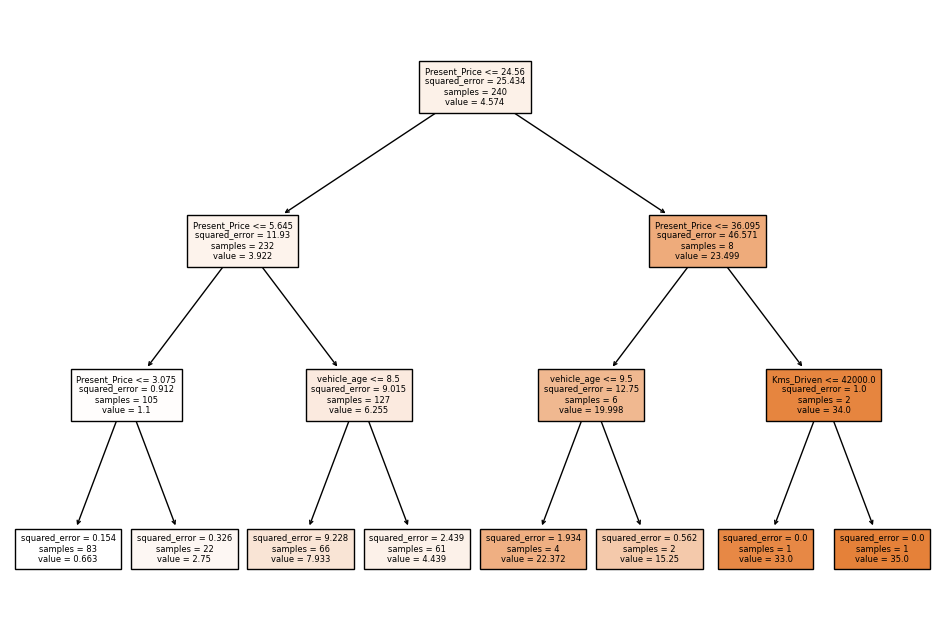

In [66]:
report_model(pruned_tree)

**Enesumit: varyans: modelin egitim ve test setindeki performanslarının ne kadar ayrıştıgını bize söyler yuksek varyans varsa model güvenimez**